<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><strong>Вывод:</strong></a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#План" data-toc-modified-id="План-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>План</a></span><ul class="toc-item"><li><span><a href="#Выделим-обучающую-и-тестовую-выборки" data-toc-modified-id="Выделим-обучающую-и-тестовую-выборки-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Выделим обучающую и тестовую выборки</a></span></li></ul></li><li><span><a href="#Без-обучения-моделей" data-toc-modified-id="Без-обучения-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Без обучения моделей</a></span><ul class="toc-item"><li><span><a href="#Константа---mean()" data-toc-modified-id="Константа---mean()-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Константа - mean()</a></span></li><li><span><a href="#Предыдущее-значение-ряда" data-toc-modified-id="Предыдущее-значение-ряда-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Предыдущее значение ряда</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#Decision-Tree-Regression" data-toc-modified-id="Decision-Tree-Regression-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Decision Tree Regression</a></span></li><li><span><a href="#LightGBM-Regression" data-toc-modified-id="LightGBM-Regression-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>LightGBM Regression</a></span></li><li><span><a href="#K-Nearest-Neighbors-Regression-(KNN)" data-toc-modified-id="K-Nearest-Neighbors-Regression-(KNN)-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>K-Nearest Neighbors Regression (KNN)</a></span></li><li><span><a href="#XGBRegressor" data-toc-modified-id="XGBRegressor-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>XGBRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.3.6"><span class="toc-item-num">3.3.6&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#Построение-нейронной-сети" data-toc-modified-id="Построение-нейронной-сети-3.3.7"><span class="toc-item-num">3.3.7&nbsp;&nbsp;</span>Построение нейронной сети</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.3.8"><span class="toc-item-num">3.3.8&nbsp;&nbsp;</span><strong>Вывод</strong>:</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span><ul class="toc-item"><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Рекомендации</a></span></li></ul></li></ul></div>

#  Прогноз количества заказов для сервиса такси

Компания такси стремится оптимизировать управление автопарком в аэропортах с помощью точного прогноза спроса, чтобы привлекать больше водителей в период пиковой нагрузки

**Задача**: разработать и обучить модель для прогнозирования количества заказов такси на следующий час, используя предоставленный размеченный датасет. Целевая метрика — RMSE на тестовой выборке не более 48.


**План проекта**:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить лучшую модель на тестовой выборке, сделать выводы.


**Описание данных**:

- Данные находятся в файле `taxi.csv`. 

- Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Загрузка и подготовка данных

### Загрузим необходимые библиотеки

In [1]:
!pip install lightgbm
!pip install torch torchvision torchaudio
!pip install catboost

In [2]:
# 1. Базовые библиотеки
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# 2. Модели машинного обучения
import torch
import torch.nn as nn
import torch.optim as optim
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# 3. Время и статистика
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt

# 4. Масштабирование и обработка данных
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error

print('Libraries imported')

Libraries imported


In [3]:
RANDOM_STATE = 42
# a special class for time series splitting
tscv = TimeSeriesSplit(n_splits=5)

### Откроем файл и ознакомимся с данными

In [4]:
# Основной путь к файлу
main_path = r'C:\Users\rx330\Desktop\Masha\PORTFOLIO\Time_series\Time_series_data\taxi.csv'

# Альтернативные пути к файлам
pth1 = '/folder_1/data.csv'
pth2 = '/folder_2/data.csv'

# Проверяем существование основного файла, если его нет - ищем в других папках
if os.path.exists(main_path):
    data = pd.read_csv(main_path, parse_dates=[0], index_col=[0])
elif os.path.exists(pth1):
    data = pd.read_csv(pth1, parse_dates=[0], index_col=[0])
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, parse_dates=[0], index_col=[0])
else:
    print('Something is wrong')

Выполним ресэмплирование данных с градацией по часу с применением функции суммирования

In [5]:
data.sort_index(inplace=True)
print(data.index.is_monotonic_increasing)
data = data.resample('1h').sum()

True


In [6]:
print(f'Размер базы данных: {data.shape}')
print(data.info())

Размер базы данных: (4416, 1)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: h
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB
None


In [7]:
data.head(5)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [8]:
print('start time -', data.index.min())
print('finish time -', data.index.max())

start time - 2018-03-01 00:00:00
finish time - 2018-08-31 23:00:00


- Данные представлены в файле размером 4416 строк, пропусков нет.
- Даты переведены в формат дат, выведены в индексы.
- В столбце num_orders представлена информация о количестве заказов такси за час
- Временной интервал - с 1 марта 2018 по 31 августа 2018 года

## Анализ

### Откроем файл и ознакомимся с данными

Выведем уникальные значения количества заказов

In [9]:
sorted(data['num_orders'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 182,
 183,
 184,
 185,


In [10]:
data.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


Построим графики количества заказов, проверим на наличие выбросов 

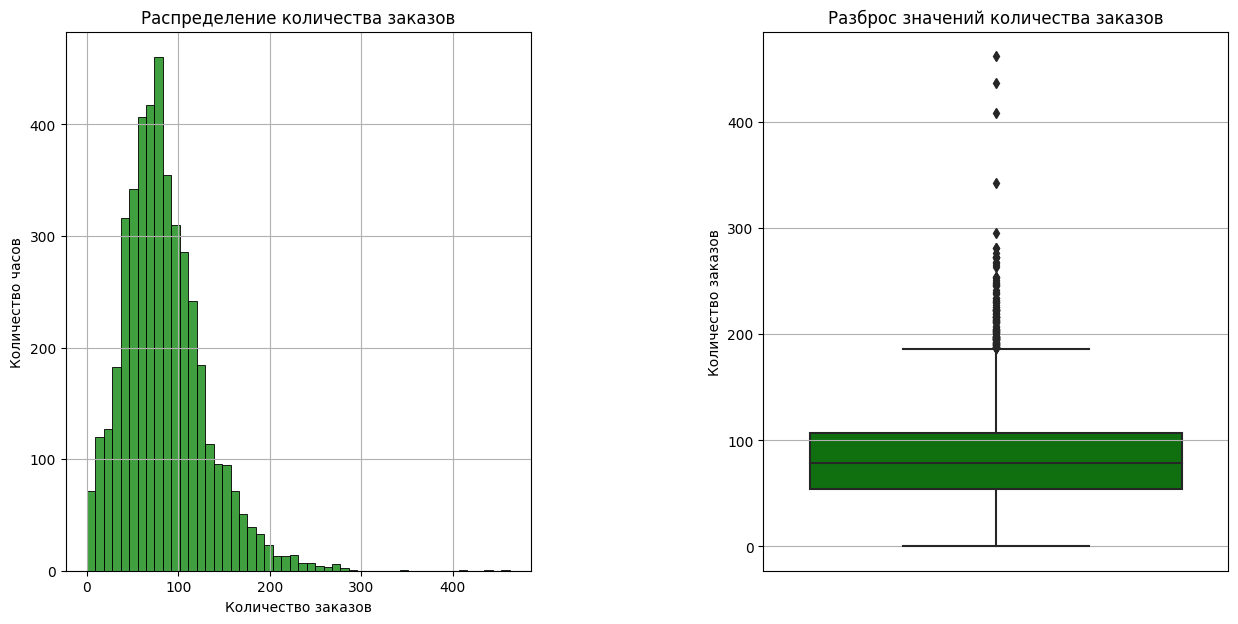

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axe = axes.ravel()

# Гистограмма
sns.histplot(data['num_orders'], kde=False, bins=50, ax=axe[0], color='green')
axe[0].set_title('Распределение количества заказов')
axe[0].set_xlabel('Количество заказов')
axe[0].set_ylabel('Количество часов')
axe[0].grid(True) 

# Boxplot
sns.boxplot(y='num_orders', data=data, ax=axe[1], color='green')
axe[1].set_title('Разброс значений количества заказов')
axe[1].set_ylabel('Количество заказов')
axe[1].set_xticks([])
axe[1].grid(True) 

plt.show()

Количество заказов, действительно, может значительно отличаться в разные дни и часы, поэтому с нулевыми значениями и выбросами ничего делать не будем.

Выведем на графики тренды и сезонность

In [12]:
decomposed = seasonal_decompose(data)

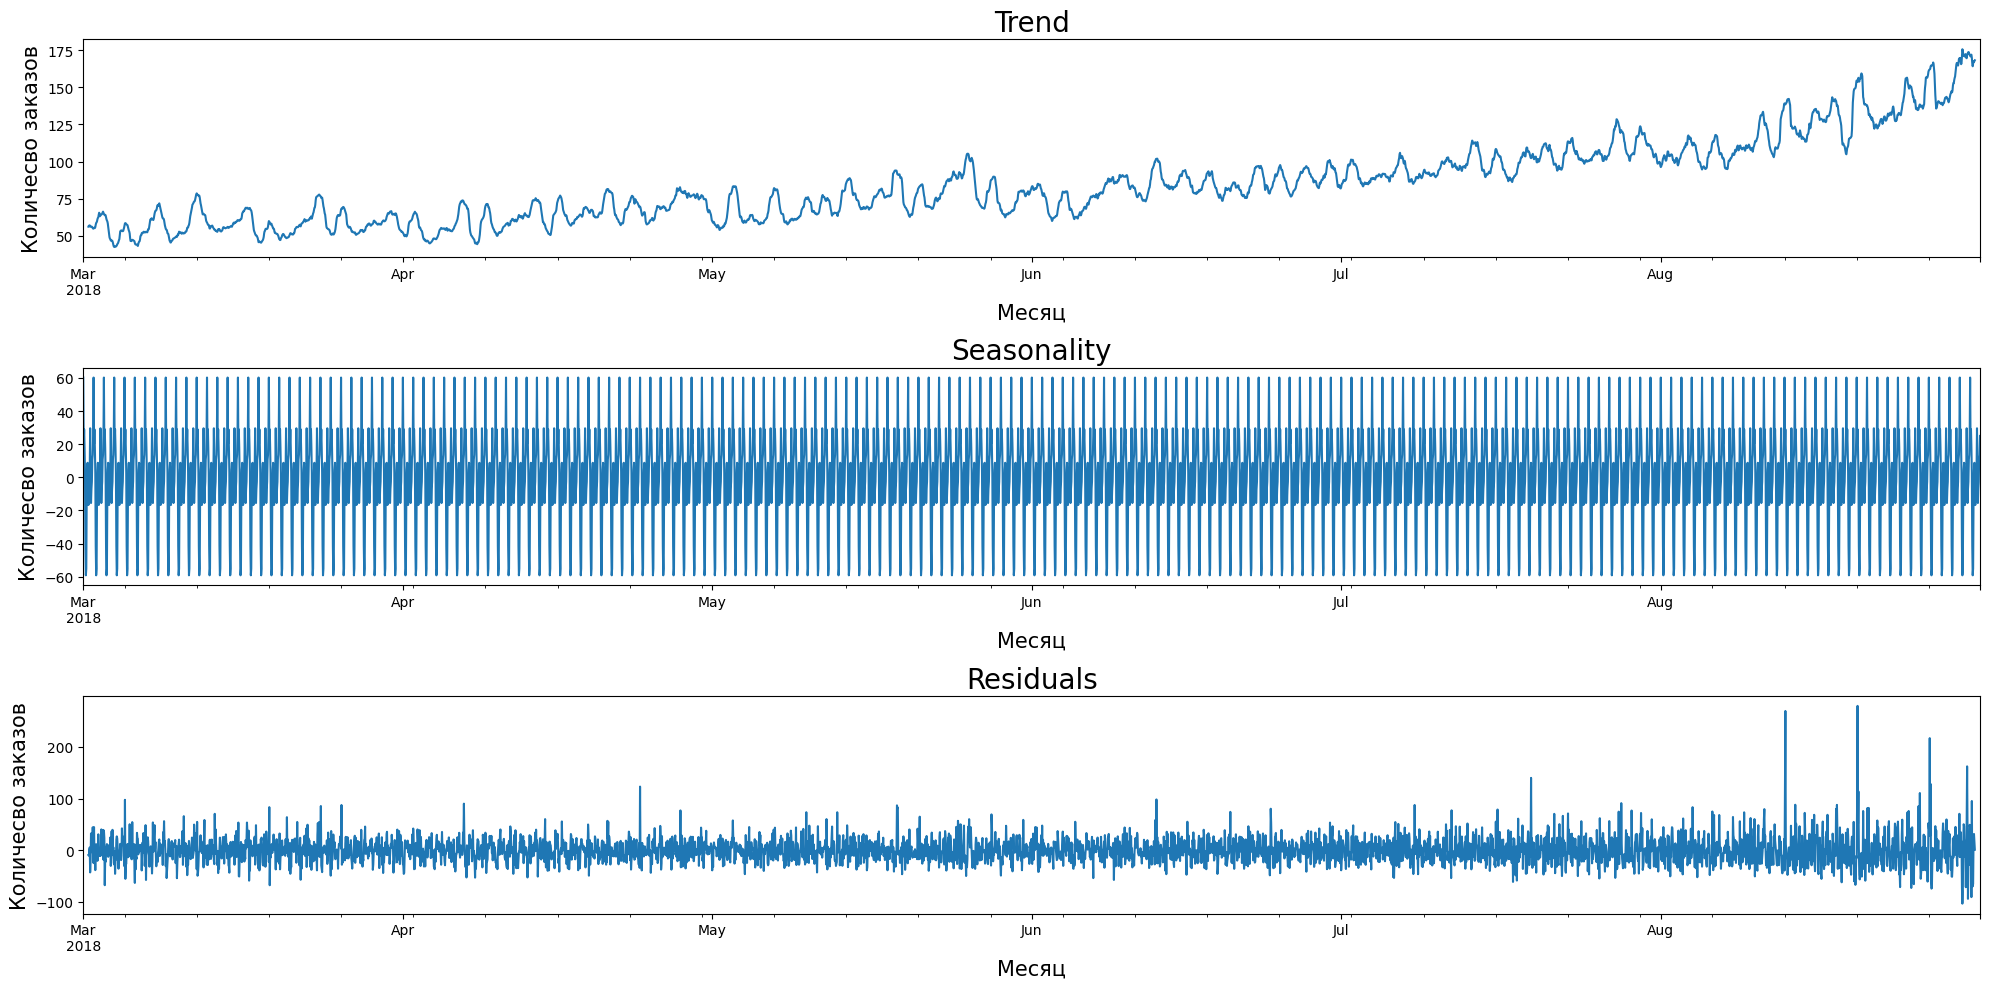

In [13]:
plt.figure(figsize=(20, 10))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend', fontsize=20)
plt.xlabel('Месяц', fontsize=15)
plt.ylabel('Количество заказов', fontsize=15)
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality', fontsize=20)
plt.xlabel('Месяц', fontsize=15)
plt.ylabel('Количество заказов', fontsize=15)
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals', fontsize=20)
plt.xlabel('Месяц', fontsize=15)
plt.ylabel('Количество заказов', fontsize=15)
plt.tight_layout()

- Тренд - увеличение количества заказов до начала августа, с резким увеличением количества заказов в августе
- Сезонность - период меньше месяца, график не показательный, так как большое количество временных рядов.
- Остатки и выбросы необъяснимы

Построим график сезонности с масштабом 2 недели и 2 дня для большей наглядности

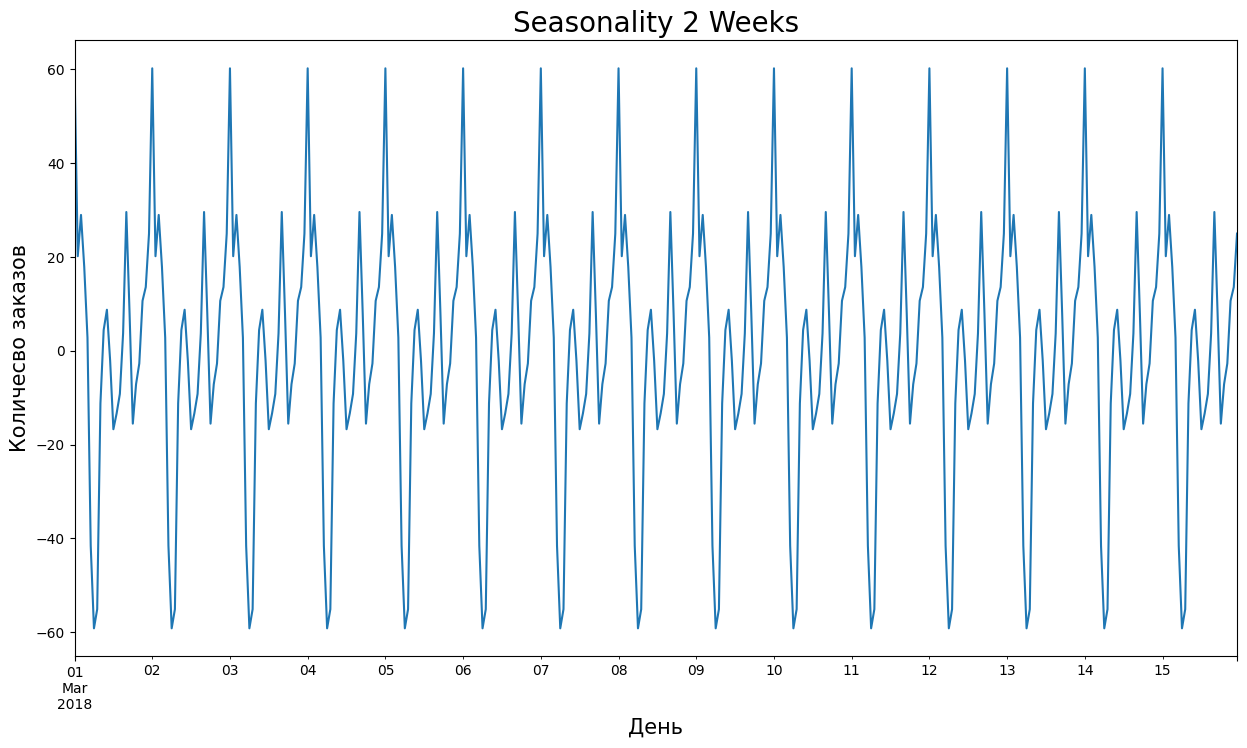

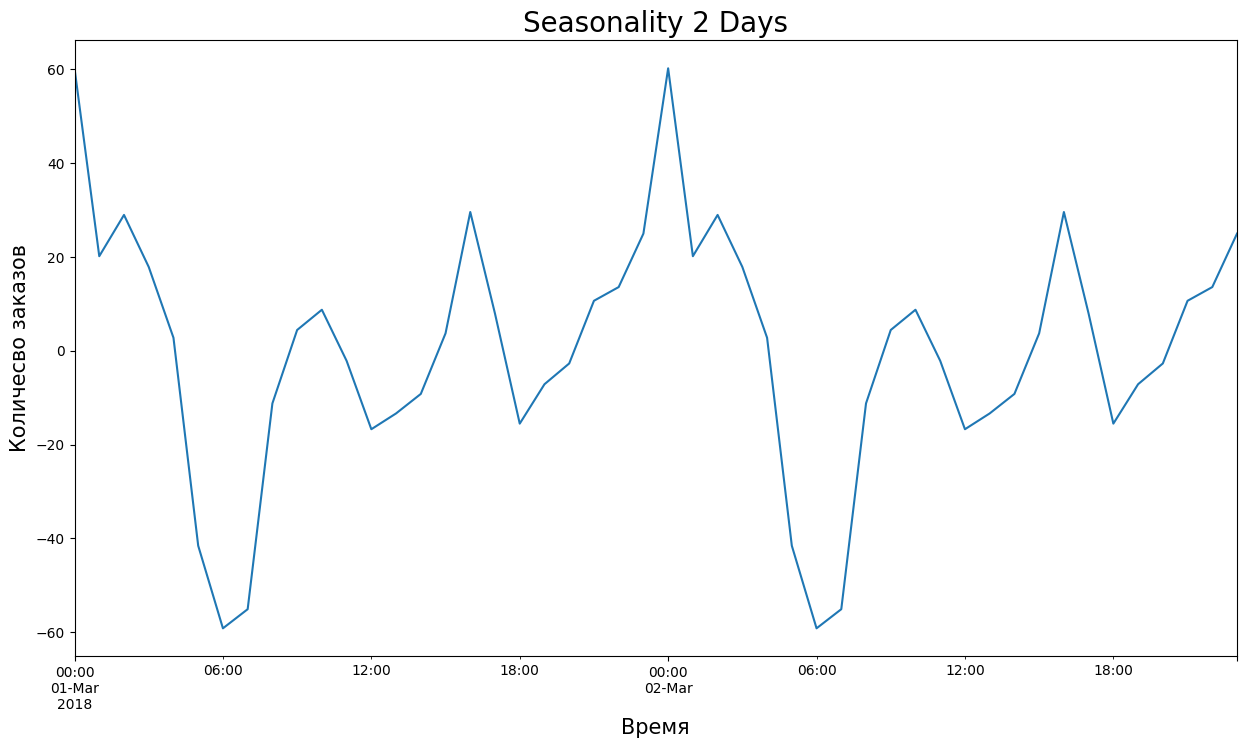

In [14]:
plt.figure(figsize=(15,8))

decomposed.seasonal['2018-03-01':'2018-03-15'].plot(ax=plt.gca(), figsize=(15,8))
plt.title('Seasonality 2 Weeks', fontsize=20)
plt.xlabel('День', fontsize=15)
plt.ylabel('Количество заказов', fontsize=15)

plt.figure(figsize=(15,8))

decomposed.seasonal['2018-03-01':'2018-03-02'].plot(ax=plt.gca(), figsize=(15,8))
plt.title('Seasonality 2 Days', fontsize=20)
plt.xlabel('Время', fontsize=15)
plt.ylabel('Количество заказов', fontsize=15);

Видно, что максимальное количество заказов приходится на 00:00 часов, потом отмечается падение уровня заказов в 6 утра с последующими двумя пиками в 11:30 и 17:30 - время перед обедом и перед окончанием рабочего дня.
Возможно, на мой взгляд, пики связаны с расписанием полетов самолетов.
Так же четко видна закономерность в течении 24 часов - то есть сезонность у нас 24 часа.

Построим графики, скользящее среднее возьмем за 24 часа (сутки)

In [15]:
data['rolling_mean'] = data.shift().rolling(24).mean()

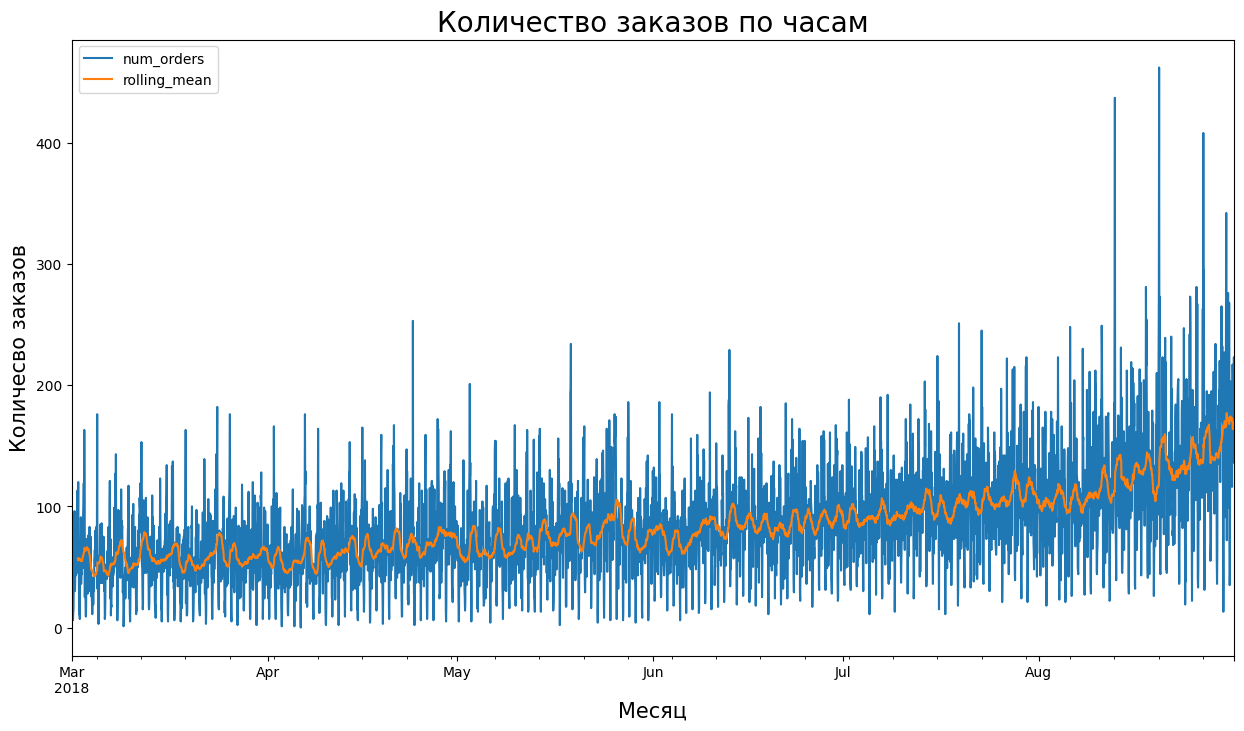

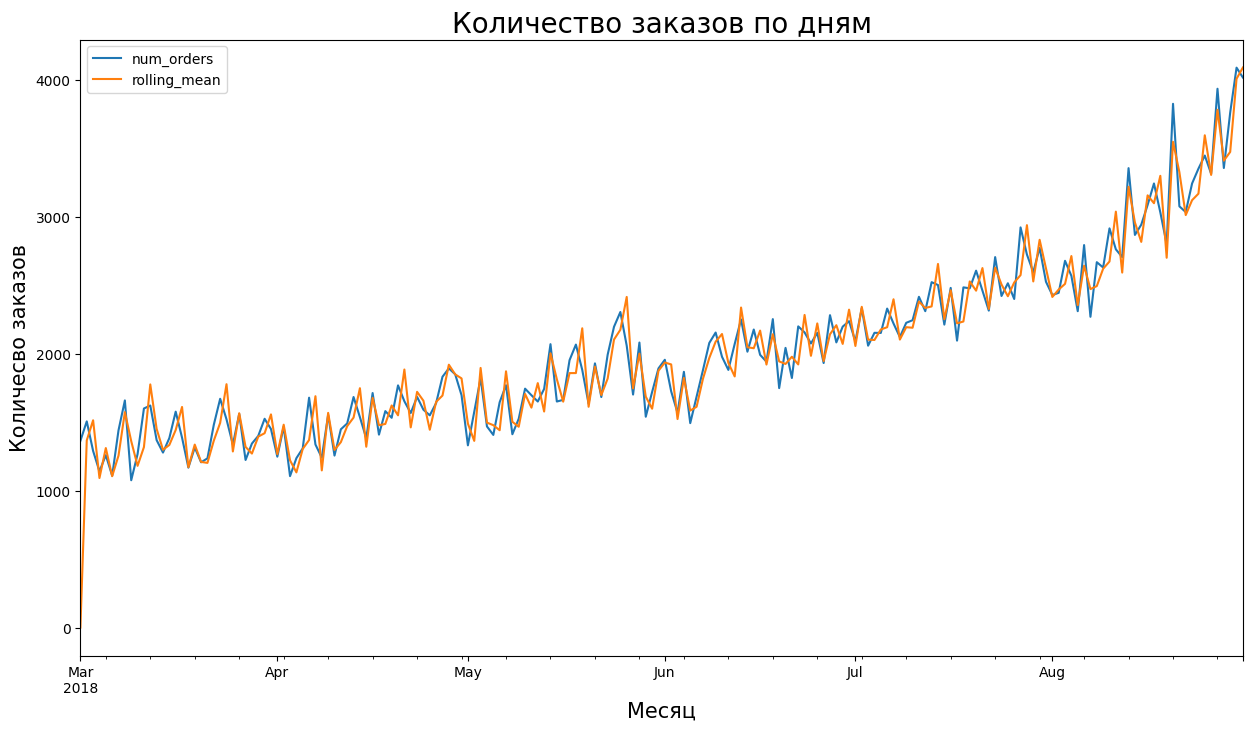

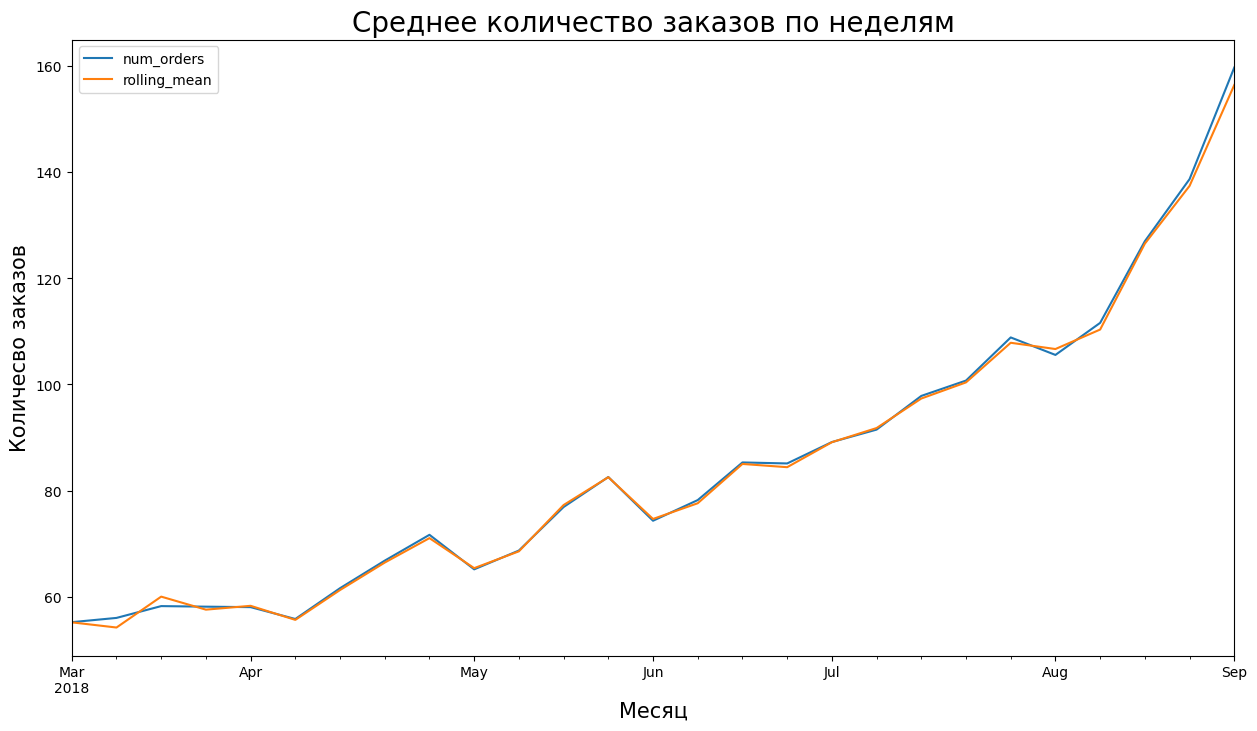

In [16]:
data.plot(figsize=(15,8))
plt.title('Количество заказов по часам', fontsize=20)
plt.xlabel('Месяц', fontsize=15)
plt.ylabel('Количество заказов', fontsize=15)
plt.show()

data_1 = data.resample('1D').sum()
data_1.plot(figsize=(15,8))
plt.title('Количество заказов по дням', fontsize=20)
plt.xlabel('Месяц', fontsize=15)
plt.ylabel('Количество заказов', fontsize=15)
plt.show()

data_2 = data.resample('1W').mean()
data_2.plot(figsize=(15,8))
plt.title('Среднее количество заказов по неделям', fontsize=20)
plt.xlabel('Месяц', fontsize=15)
plt.ylabel('Количество заказов', fontsize=15)
plt.show()

- На графике в разбивке по часу видны пиковые значения в августе.
- На графике количества заказов по дням и среднего количества заказов по неделям виден стабильный рост количества заказов с марта по начало августа, а в августе наблюдается рост заказов, что может быть объяснено периодом отпусков и возвращением студентов/учащихся к учебному году
- **Вывод**: Согласно полученным графикам мы видим, что скользящее среднее увеличивается со временем, что говорит о том, что временной ряд не стационарен.

Проверим ряд на стационарность, используя тест Дики-Фуллера (Augmented Dickey-Fuller test, ADF).

Формулируем гипотезы:
- нулевая гипотеза - ряд нестационарен
- альтернативная гипотеза - ряд стационарен

Сравнение p-value с 𝛼 (с уровнем значимости alpha): если p-value < 𝛼, то отвергаем нулевую гипотезу (то есть ряд стационарен).

In [17]:
# Применение теста Дики-Фуллера
result = adfuller(data['num_orders'].dropna())  # Убираем NaN

# Уровень значимости
alpha = 0.05

# Вывод результатов теста
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items(): # Проверим 1%, 5% и 10%
    print('\t%s: %.3f' % (key, value))

# Сравнение p-value с alpha
if result[1] < alpha:
    print(f"p-value ({result[1]:.4f}) < alpha ({alpha}), следовательно, ряд стационарен (отвергаем нулевую гипотезу).")
else:
    print(f"p-value ({result[1]:.4f}) >= alpha ({alpha}), следовательно, ряд нестационарен (не удается отвергнуть нулевую гипотезу).")

ADF Statistic: -3.068924
p-value: 0.028940
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
p-value (0.0289) < alpha (0.05), следовательно, ряд стационарен (отвергаем нулевую гипотезу).


**Интерпретация и вывод:**

- ADF Statistic: -3.068924

Статистика теста Дики-Фуллера равна -3.0689. Это число будет сравниваться с критическими значениями на разных уровнях значимости (1%, 5%, 10%) для определения, можно ли отвергнуть нулевую гипотезу о нестационарности ряда.

- p-value: 0.028940

Значение p-value равно 0.0289, что меньше выбранного уровня значимости α = 0.05. Это означает, что вероятность случайно получить такой результат при условии, что нулевая гипотеза верна, составляет около 2.89%. Поскольку p-value меньше 0.05, мы отвергаем нулевую гипотезу о нестационарности.

**Critical Values:**

- 1%: -3.432

Это критическое значение на уровне 1% значимости. Тестовая статистика (-3.0689) больше этого критического значения, поэтому мы не можем отвергнуть нулевую гипотезу на уровне 1%.
- 5%: -2.862

Это критическое значение на уровне 5% значимости. Тестовая статистика (-3.0689) меньше этого значения, поэтому на уровне значимости 5% нулевая гипотеза отвергается.
- 10%: -2.567

На уровне значимости 10% также можно отвергнуть нулевую гипотезу, поскольку тестовая статистика меньше критического значения.

**Вывод:**

В связи с тем, что:
- на более строгом уровне значимости (1%) мы не можем отвергнуть нулевую гипотезу
- наблюдается заметная динамика увеличения скользящего среднего на графиках 
делаем вывод, что ряд нестационарен.

Удалим столбкц со скользящим средним, чтобы он не мешал для дальнейшей работы

In [18]:
data = data.drop('rolling_mean', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: h
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


Добавим новые столбцы, так как на графиках в анализе данных были видны тренд и сезонность, добавим день и день недели так как они влияют на количество заказов, месяц добавлять не будем, так как у нас нет данных за полный год и модель не сможет адекватно работать на всех месяцах, если они будут в тестовой выборке

In [19]:
data['day'] = data.index.day
data['dayofweek'] = data.index.dayofweek
data['hour'] = data.index.hour

display(data.head())
print(data.info())

,num_orders,day,dayofweek,hour
datetime,,,,
2018-03-01 00:00:00,124,1,3,0
2018-03-01 01:00:00,85,1,3,1
2018-03-01 02:00:00,71,1,3,2
2018-03-01 03:00:00,66,1,3,3
2018-03-01 04:00:00,43,1,3,4


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: h
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
 1   day         4416 non-null   int32
 2   dayofweek   4416 non-null   int32
 3   hour        4416 non-null   int32
dtypes: int32(3), int64(1)
memory usage: 120.8 KB
None


### **Вывод:**

Анализ показал, что наблюдается зависимость количества заказов от месяца и времени суток.

- Количество заказов возрастает с марта по август, достигая пика в августе. 
- Максимальное количество заказов приходится на 00:00, с последующим спадом к 6:00 утра и двумя пиками в 11:30 и 17:30, которые могут быть связаны с расписанием авиарейсов. 
- Закономерности в заказах чётко прослеживаются в течение суток. 
- Для дальнейшего анализа и прогнозирования добавлены новые столбцы, включающие данные по дням, дням недели и часам.

## Обучение

- Разработать модель для предсказания количества заказов такси на следующий час.
- Размер тестовой выборки взять 10%.
- Метрика RMSE на тестовой выборке не должна превышать 48.

### План

1. Разделить данные на тренировочную и тестовую выборки, выделив 10% данных в тестовую выборку.
2. Спрогнозировать базовое количество заказов без использования модели — это будет служить ориентиром и проверкой адекватности построенных моделей.
3. Подбор оптимальных гиперпараметров для модели LinearRegression — определить наилучшие значения для количества лагов временного ряда и размера окна скользящего среднего, чтобы выбрать лучшее решение, которое далее будем применять к остальным моделям.
4. Обучение моделей с последующей оценкой качества через кросс-валидацию.
5. Оценка модели на тренировочной выборке — рассчитать RMSE на тренировочной выборке, используя лучшие параметры (lag и rolling mean), и дополнительно измерить время обучения моделей.

Поскольку выборки разделяются без перемешивания данных, в тестовую выборку попадают данные с более высоким количеством заказов, чем в тренировочную. Из-за этого метрика RMSE на тестовой выборке может быть значительно хуже. Поэтому на тренировочной выборке значение RMSE должно быть меньше 48.

### Выделим обучающую и тестовую выборки

In [20]:
X = data.drop(columns=['num_orders'])  # Признаки
y = data['num_orders']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.1, random_state=RANDOM_STATE)

print('Обучающая выборка:')
print(X_train.shape)
print('Тестовая выборка:')
print(X_test.shape)

Обучающая выборка:
(3974, 3)
Тестовая выборка:
(442, 3)


In [21]:
print('Временной интервал (обучающая выборка):')
print(X_train.index.min(), X_train.index.max())
print('Временной интервал (тестовая выборка):')
print(X_test.index.min(), X_test.index.max())

Временной интервал (обучающая выборка):
2018-03-01 00:00:00 2018-08-13 13:00:00
Временной интервал (тестовая выборка):
2018-08-13 14:00:00 2018-08-31 23:00:00


Выборки подготовлены, разделение прошло верно.

### Без обучения моделей (Baseline-модель)

Спрогнозируем временные ряды без обучения модели, чтобы у нас был ориентир по данным.

#### Константа - mean()

Все значения тестовой выборки предсказываются одним и тем же числом **(константой)**. Для метрики RMSE — оптимальной константой будет среднее (mean) целевых значений. Это связано с тем, что среднее минимизирует сумму квадратов отклонений, которая используется в RMSE.

In [22]:
pred_median = np.ones(y_test.shape) * y_train.mean()

# Вычисляем RMSE
rmse_const = round(sqrt(mean_squared_error(y_test, pred_median)), 4)

print("Среднее количество заказов в час:", y_test.mean())
print("RMSE:", rmse_const)

Среднее количество заказов в час: 139.55656108597285
RMSE: 84.7441


In [23]:
table = pd.DataFrame([['Сonstant', '-', 'mean', rmse_const]],
                    columns=['Модель', 'Время обучения', 'Параметры', 'Значение RMSE'])
table

,Модель,Время обучения,Параметры,Значение RMSE
0,Сonstant,-,mean,84.7441


**Вывод**:
Значение RMSE относительно высокое по сравнению со средним количеством заказов (139.56). Это указывает на то, что  предсказания имеют значительное отклонение от фактических данных (60%).

#### Предыдущее значение ряда

Новое значение x(t) прогнозируется предыдущим значением ряда, то есть x(t-1). Этот способ не зависит от метрики.

То есть, как если бы в следующий час заказывали столько же такcи, сколько и в предыдущий.

In [24]:
print("Среднее количество заказов в час:", y_test.mean())
pred_previous = y_test.shift(1)
# Заполним первое значение сдвинутого ряда
pred_previous.iloc[0] = y_test.iloc[-1]  # последнее значение тренировочной выборки

rmse_prev = sqrt(mean_squared_error(y_test, pred_previous))

print("RMSE:", rmse_prev)

Среднее количество заказов в час: 139.55656108597285
RMSE: 59.054503546641314


In [25]:
table.loc[len(table.index )] = ['Prev_amount', '-', 'prev_amount', rmse_prev]
table

,Модель,Время обучения,Параметры,Значение RMSE
0,Сonstant,-,mean,84.744100
1,Prev_amount,-,prev_amount,59.054504


**Вывод**:
Данный способ показывает лучше результаты, но все же отклонение еще велико (42%).

### Обучение моделей

- Добавим новые признаки, уберем строки с отсутствующими значениями.
- Подберем lag и rolling_mean на LinearRegression.
- На полученных лучших данных будем обучать остальные модели

In [26]:
def make_features(data, max_lag, rolling_mean_size):
    data = data.copy()
    # Создаём словарь для лагов
    lagged_features = {f'lag_{lag}': data['num_orders'].shift(lag) for lag in range(1, max_lag + 1)}

    # Вычисляем скользящее среднее
    rolling_mean = data['num_orders'].shift(1).rolling(window=rolling_mean_size).mean()

    # Объединяем исходный DataFrame с лагами и скользящим средним
    data = pd.concat([data] + [pd.DataFrame(lagged_features), pd.DataFrame({'rolling_mean': rolling_mean})], axis=1)

    # Убираем строки с NaN, которые появляются из-за сдвигов
    return data.dropna()

Напишем функцию по замеру времени обучения модели

In [27]:
def measure_training_time(model, X_train, y_train):
    start_time_training = time.time()
    # Обучение модели на данных
    model.fit(X_train, y_train)
    end_time_training = time.time()
    training_time = end_time_training - start_time_training
    return training_time

#### LinearRegression

In [28]:
# Поиск лучших параметров для лагов и скользящего среднего
best_rmse = float("inf")
best_lag = None
best_rolling_mean = None
best_params_lr = None

# Создаем признаки только один раз перед циклом для исходного набора данных
data_lagged = make_features(data.copy(), max_lag=168, rolling_mean_size=100) 

# Разделение данных на обучающую и тестовую выборки один раз до цикла
X = data_lagged.drop(columns=['num_orders'])  # Признаки
y = data_lagged['num_orders']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.1, random_state=RANDOM_STATE)

for lag in range(168, 172):
    for rolling_mean in range(100, 104):
        # Создаем признаки с заданными параметрами lag и rolling_mean
        data_lagged = make_features(data.copy(), lag, rolling_mean)

        # Обновление признаков
        X_train = data_lagged.drop(columns=['num_orders'])
        y_train = data_lagged['num_orders']

        # Создание модели и пайплайна
        model = LinearRegression()
        pipeline = Pipeline([
            ('scaler', MinMaxScaler()),  
            ('linear_regression', model)
        ])

        # Гиперпараметры для перебора
        param_grid = {
            'scaler': [StandardScaler(), MinMaxScaler()]
        }

        # Перебор гиперпараметров и оценка модели
        lr = GridSearchCV(pipeline, param_grid, cv=tscv, scoring='neg_root_mean_squared_error', return_train_score=True)
        lr.fit(X_train, y_train)

        # Сравнение и сохранение наилучших параметров
        mean_rmse = -lr.best_score_

        if mean_rmse < best_rmse:
            best_rmse = mean_rmse
            best_lag = lag
            best_rolling_mean = rolling_mean
            best_params_lr = lr.best_params_

        print(f"Lag: {lag}\nRolling Mean: {rolling_mean}\nMean RMSE (Cross-Validation): {mean_rmse:.2f}\n")

# Обучение лучшей модели и замер времени
best_model_lr = lr.best_estimator_

best_model_lr.fit(X_train, y_train)

training_time_lr = measure_training_time(best_model_lr, X_train, y_train)

print(f"Время обучения лучшей модели: {training_time_lr:.4f} секунд")

# Итоговый лучший результат
print(f"Лучший RMSE: {best_rmse:.2f}\nЛаг: {best_lag}\nСкользящее среднее: {best_rolling_mean}\nПараметры: {best_params_lr}")

Lag: 168
Rolling Mean: 100
Mean RMSE (Cross-Validation): 24.25

Lag: 168
Rolling Mean: 101
Mean RMSE (Cross-Validation): 24.30

Lag: 168
Rolling Mean: 102
Mean RMSE (Cross-Validation): 24.26

Lag: 168
Rolling Mean: 103
Mean RMSE (Cross-Validation): 24.26

Lag: 169
Rolling Mean: 100
Mean RMSE (Cross-Validation): 24.26

Lag: 169
Rolling Mean: 101
Mean RMSE (Cross-Validation): 24.25

Lag: 169
Rolling Mean: 102
Mean RMSE (Cross-Validation): 24.40

Lag: 169
Rolling Mean: 103
Mean RMSE (Cross-Validation): 24.26

Lag: 170
Rolling Mean: 100
Mean RMSE (Cross-Validation): 24.34

Lag: 170
Rolling Mean: 101
Mean RMSE (Cross-Validation): 24.34

Lag: 170
Rolling Mean: 102
Mean RMSE (Cross-Validation): 24.36

Lag: 170
Rolling Mean: 103
Mean RMSE (Cross-Validation): 24.35

Lag: 171
Rolling Mean: 100
Mean RMSE (Cross-Validation): 24.34

Lag: 171
Rolling Mean: 101
Mean RMSE (Cross-Validation): 24.35

Lag: 171
Rolling Mean: 102
Mean RMSE (Cross-Validation): 24.35

Lag: 171
Rolling Mean: 103
Mean RMSE (Cr

Лучшие показатели получились такие:
- Lag: 168
- Rolling Mean: 100

In [30]:
data = make_features(data, 168, 100)

X = data.drop(columns=['num_orders'])  # Признаки
y = data['num_orders']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.1, random_state=RANDOM_STATE)

display(data.head())

,num_orders,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_160,lag_161,lag_162,lag_163,lag_164,lag_165,lag_166,lag_167,lag_168,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-08 00:00:00,143,8,3,0,94.0,127.0,108.0,76.0,50.0,99.0,...,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,51.87
2018-03-08 01:00:00,78,8,3,1,143.0,94.0,127.0,108.0,76.0,50.0,...,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,52.47
2018-03-08 02:00:00,65,8,3,2,78.0,143.0,94.0,127.0,108.0,76.0,...,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,52.77
2018-03-08 03:00:00,68,8,3,3,65.0,78.0,143.0,94.0,127.0,108.0,...,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,52.79
2018-03-08 04:00:00,60,8,3,4,68.0,65.0,78.0,143.0,94.0,127.0,...,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,53.04


In [31]:
table.loc[len(table.index )] = ['LinearRegression', training_time_lr, best_params_lr, best_rmse]
table

,Модель,Время обучения,Параметры,Значение RMSE
0,Сonstant,-,mean,84.744100
1,Prev_amount,-,prev_amount,59.054504
2,LinearRegression,0.078104,{'scaler': StandardScaler()},24.250628


#### Decision Tree Regression

In [32]:
model = DecisionTreeRegressor(random_state=RANDOM_STATE)

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', model)  
])

# Define hyperparameters for tuning
param_grid = {
    'regressor__max_depth': [2, 3, 5],
    'regressor__min_samples_split': [5, 10, 20, 30],
    'regressor__min_samples_leaf': [6, 8, 10],
    'regressor__max_features': ['auto', 'sqrt', 'log2']
}

# Perform grid search and evaluate the model
dtr = GridSearchCV(pipeline, 
                   param_grid, 
                   cv=tscv, 
                   scoring='neg_root_mean_squared_error',
                   n_jobs=-1)

# Fit the model
dtr.fit(X_train, y_train)

# Best Params and RMSE
best_params_dtr = dtr.best_params_
best_metric_dtr = round(dtr.best_score_, 2) * (-1)
print(f"Best Params: {best_params_dtr}, Best RMSE on training set: {best_metric_dtr}")

# Training the best model and measuring the time
best_model_dtr = dtr.best_estimator_
best_model_dtr.fit(X_train, y_train)
training_time_dtr = measure_training_time(best_model_dtr, X_train, y_train)
print(f"Time taken to train the best model: {training_time_dtr:.4f} seconds")

Best Params: {'regressor__max_depth': 5, 'regressor__max_features': 'auto', 'regressor__min_samples_leaf': 10, 'regressor__min_samples_split': 30}, Best RMSE on training set: 26.9
Time taken to train the best model: 0.2283 seconds


In [33]:
table.loc[len(table.index )] = ['DecisionTreeRegressor', training_time_dtr, best_params_dtr, best_metric_dtr]
table

,Модель,Время обучения,Параметры,Значение RMSE
0,Сonstant,-,mean,84.744100
1,Prev_amount,-,prev_amount,59.054504
2,LinearRegression,0.078104,{'scaler': StandardScaler()},24.250628
3,DecisionTreeRegressor,0.228341,"{'regressor__max_depth': 5, 'regressor__max_fe...",26.900000


#### LightGBM Regression

In [34]:
model = LGBMRegressor(random_state = RANDOM_STATE) 
# Define hyperparameters for tuning
param_grid = [
    {'n_estimators': [x for x in range(50,201,50)],  # количество деревьев от 50 до 200 включительно с шагом 50
     'learning_rate': [0.001, 0.01, 0.1]}]

# Perform grid search and evaluate the model
lgbm = GridSearchCV(model, 
                    param_grid, 
                    cv=tscv, 
                    scoring='neg_root_mean_squared_error',
                    n_jobs=-1)

# Fit the model
lgbm.fit(X_train, y_train)

best_params_lgbm = lgbm.best_params_
best_metric_lgbm = round(lgbm.best_score_, 2) * (-1)

# Print results
print(f"Best Params: {best_params_lgbm}, Best RMSE on training set: {best_metric_lgbm}")

# Обучение лучшей модели и замер времени
best_model_lgbm = lgbm.best_estimator_
best_model_lgbm.fit(X_train, y_train)
training_time_lgbm = measure_training_time(best_model_lgbm, X_train, y_train)

print(f"Training time of the best model: {training_time_lgbm:.4f} seconds")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31619
[LightGBM] [Info] Number of data points in the train set: 3823, number of used features: 172
[LightGBM] [Info] Start training from score 79.561601
Best Params: {'learning_rate': 0.1, 'n_estimators': 50}, Best RMSE on training set: 23.05
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31619
[LightGBM] [Info] Number of data points in the train set: 3823, number of used features: 172
[LightGBM] [Info] Start training from score 79.561601
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31619
[LightGBM] [Info] Number 

In [35]:
table.loc[len(table.index )] = ['LGBMRegressor', training_time_lgbm, best_params_lgbm, best_metric_lgbm]
table

,Модель,Время обучения,Параметры,Значение RMSE
0,Сonstant,-,mean,84.744100
1,Prev_amount,-,prev_amount,59.054504
2,LinearRegression,0.078104,{'scaler': StandardScaler()},24.250628
3,DecisionTreeRegressor,0.228341,"{'regressor__max_depth': 5, 'regressor__max_fe...",26.900000
4,LGBMRegressor,0.673028,"{'learning_rate': 0.1, 'n_estimators': 50}",23.050000


#### K-Nearest Neighbors Regression (KNN)

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsRegressor()

# Define hyperparameters for tuning
param_grid = {
    'n_neighbors': range(5, 10, 30),
    'weights': ['uniform', 'distance']
}
                    
# Perform grid search and evaluate the model
knn = GridSearchCV(model, 
                   param_grid, 
                   cv=tscv, 
                   scoring='neg_root_mean_squared_error',
                   n_jobs=-1)


# Fit the model
knn.fit(X_train, y_train)

best_params_knn = knn.best_params_
best_metric_knn = round(knn.best_score_, 2) * (-1)

# Print results
print(f"Best Params: {best_params_knn}, Best RMSE on training set: {best_metric_knn}")

# Обучение лучшей модели и замер времени
best_model_knn = knn.best_estimator_
best_model_knn.fit(X_train, y_train)

training_time_knn = measure_training_time(best_model_knn, X_train, y_train)

print(f"Training time of the best model: {training_time_knn:.4f} seconds")

Best Params: {'n_neighbors': 5, 'weights': 'distance'}, Best RMSE on training set: 25.32
Time taken to train the best model: 0.0156 seconds


In [37]:
table.loc[len(table.index )] = ['KNeighborsRegressor', training_time_knn, best_params_knn, best_metric_knn]
table

,Модель,Время обучения,Параметры,Значение RMSE
0,Сonstant,-,mean,84.744100
1,Prev_amount,-,prev_amount,59.054504
2,LinearRegression,0.078104,{'scaler': StandardScaler()},24.250628
3,DecisionTreeRegressor,0.228341,"{'regressor__max_depth': 5, 'regressor__max_fe...",26.900000
4,LGBMRegressor,0.673028,"{'learning_rate': 0.1, 'n_estimators': 50}",23.050000
5,KNeighborsRegressor,0.01559,"{'n_neighbors': 5, 'weights': 'distance'}",25.320000


#### XGBRegressor

In [38]:
model = XGBRegressor(random_state=RANDOM_STATE)

In [39]:
# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [2, 3]
}

# Perform grid search and evaluate the model
xgb = GridSearchCV(model, 
                   param_grid, 
                   cv=tscv, 
                   scoring='neg_root_mean_squared_error',
                   n_jobs=-1)

# Обучение GridSearchCV на данных
xgb.fit(X_train, y_train)

# Вывод лучших гиперпараметров и RMSE
best_params_xgb = xgb.best_params_
best_rmse_xgb = round(xgb.best_score_, 4) * (-1)

# Обучение лучшей модели и замер времени
best_model_xgb = xgb.best_estimator_
best_model_xgb.fit(X_train, y_train)
training_time_xgb = measure_training_time(best_model_xgb, X_train, y_train)

print(f"Time taken to train the best model: {training_time_xgb:.4f} seconds")

Time taken to train the best model: 0.7037 seconds


In [40]:
table.loc[len(table.index )] = ['XGBRegressor', training_time_xgb, best_params_xgb, best_rmse_xgb]
table

,Модель,Время обучения,Параметры,Значение RMSE
0,Сonstant,-,mean,84.744100
1,Prev_amount,-,prev_amount,59.054504
2,LinearRegression,0.078104,{'scaler': StandardScaler()},24.250628
3,DecisionTreeRegressor,0.228341,"{'regressor__max_depth': 5, 'regressor__max_fe...",26.900000
4,LGBMRegressor,0.673028,"{'learning_rate': 0.1, 'n_estimators': 50}",23.050000
5,KNeighborsRegressor,0.01559,"{'n_neighbors': 5, 'weights': 'distance'}",25.320000
6,XGBRegressor,0.703722,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",22.501600


#### CatBoostRegressor

In [41]:
model = CatBoostRegressor(silent=True, random_state=RANDOM_STATE)
# Define hyperparameters for tuning
param_grid = {
    'iterations': [50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1],
}

# Perform grid search and evaluate the model
catboost = GridSearchCV(model, 
                        param_grid, 
                        cv=tscv, 
                        scoring='neg_root_mean_squared_error',
                        n_jobs=-1)


# Fit the model
catboost.fit(X_train, y_train)

# Лучшие гиперпараметры и RMSE
best_params_catboost = catboost.best_params_
best_rmse_catboost = round(catboost.best_score_, 4) * (-1)

# Обучение лучшей модели и замер времени
best_model_catboost = catboost.best_estimator_
# Обучение лучшей модели на данных
best_model_catboost.fit(X_train, y_train)
training_time_catboost = measure_training_time(best_model_catboost, X_train, y_train)

print(f"Time taken to train the best model: {training_time_catboost:.4f} seconds")

Time taken to train the best model: 3.3487 seconds


In [42]:
table.loc[len(table.index )] = ['CatBoostRegressor', training_time_catboost, best_params_catboost, best_rmse_catboost]
table

,Модель,Время обучения,Параметры,Значение RMSE
0,Сonstant,-,mean,84.744100
1,Prev_amount,-,prev_amount,59.054504
2,LinearRegression,0.078104,{'scaler': StandardScaler()},24.250628
3,DecisionTreeRegressor,0.228341,"{'regressor__max_depth': 5, 'regressor__max_fe...",26.900000
4,LGBMRegressor,0.673028,"{'learning_rate': 0.1, 'n_estimators': 50}",23.050000
5,KNeighborsRegressor,0.01559,"{'n_neighbors': 5, 'weights': 'distance'}",25.320000
6,XGBRegressor,0.703722,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",22.501600
7,CatBoostRegressor,3.348722,"{'iterations': 100, 'learning_rate': 0.1}",22.763300


#### Построение нейронной сети

In [43]:
# Преобразование данных в тензоры
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  

# Функция для создания модели с заданными гиперпараметрами
def create_model(n_in_neurons, n_hidden_neurons_list, activation_func):
    layers = []
    layers.append(nn.Linear(n_in_neurons, n_hidden_neurons_list[0]))
    layers.append(activation_func)
    
    for i in range(1, len(n_hidden_neurons_list)):
        layers.append(nn.Linear(n_hidden_neurons_list[i-1], n_hidden_neurons_list[i]))
        layers.append(activation_func)

    layers.append(nn.Linear(n_hidden_neurons_list[-1], 1))  # Выходной слой
    return nn.Sequential(*layers)

# Функция для обучения модели
def train_network(net, optimizer, loss, X_train, y_train, num_epochs=100):
    start_time = time.time() 
    for epoch in range(num_epochs):
        net.train()  # Переводим модель в режим обучения
        optimizer.zero_grad()  # Обнуляем градиенты перед каждым шагом
        preds_train = net(X_train)  # Прямой проход
        train_loss = loss(preds_train, y_train)  # Вычисляем ошибку
        train_loss.backward()  # Обратное распространение
        optimizer.step()  # Обновляем параметры сети
    end_time = time.time()  # End timing
    training_time = end_time - start_time  # Calculate the elapsed time
    return training_time 

In [44]:
# Функция для кросс-валидации на временных рядах
def cross_validate_model_timeseries(X, y, create_model_func, params, num_splits=5, num_epochs=100):
    tscv = TimeSeriesSplit(n_splits=num_splits)
    rmse_scores = []
    
    for train_index, val_index in tscv.split(X):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        model_params = {k: v for k, v in params.items() if k != 'learning_rate'}
        net = create_model_func(**model_params) 
        optimizer = optim.Adam(net.parameters(), lr=params['learning_rate'])
        loss = nn.MSELoss()

        # Обучение модели
        train_network(net, optimizer, loss, X_train_fold, y_train_fold, num_epochs)  # Uses the cross-validation num_epochs

        # Оценка на валидационной выборке
        net.eval()  # Режим тестирования
        with torch.no_grad():
            preds_val = net(X_val_fold)
            val_loss = loss(preds_val, y_val_fold)
            rmse_val = torch.sqrt(val_loss).item()
            rmse_scores.append(rmse_val)

    avg_rmse = np.mean(rmse_scores)
    return avg_rmse

In [45]:
# Переменные для лучшей модели и её времени обучения
best_rmse = float('inf')
best_params = {}

# Определение гиперпараметров для перебора
hidden_layer_options = [[10, 20], [20, 40], [30, 50, 30]] 
learning_rates = [0.001, 0.0001, 0.01]  
activation_functions = [nn.ReLU(), nn.Tanh()]  

# Количество входных нейронов 
n_in_neurons = X_train.shape[1]  # Количество признаков


# Перебор гиперпараметров
for n_hidden_neurons in hidden_layer_options:
    for lr in learning_rates:
        for activation_func in activation_functions:
            # Подготовка параметров для модели
            params = {
                'n_in_neurons': n_in_neurons,
                'n_hidden_neurons_list': n_hidden_neurons,
                'activation_func': activation_func,
                'learning_rate': lr
            }
            
            # Кросс-валидация для временных рядов
            avg_rmse = cross_validate_model_timeseries(X_train_tensor, y_train_tensor, create_model, params, num_splits=5, num_epochs=100)
            
            # Сравнение текущего RMSE с наилучшим
            if avg_rmse < best_rmse:
                best_rmse = avg_rmse
                best_params = {
                    'hidden_layers': n_hidden_neurons,
                    'learning_rate': lr,
                    'activation_func': activation_func.__class__.__name__
                }

# Вывод лучших параметров и наилучшего RMSE
print("\nЛучшие параметры:")
print(best_params)
print(f"Лучший RMSE: {best_rmse}")

# Тренируем модель с лучшими параметрами и выводим время обучения (final model training)
best_model_params = {
    'n_in_neurons': n_in_neurons,
    'n_hidden_neurons_list': best_params['hidden_layers'],
    'activation_func': [act for act in activation_functions if act.__class__.__name__ == best_params['activation_func']][0]
}

# Создание и обучение лучшей модели
best_net = create_model(**best_model_params)
best_optimizer = optim.Adam(best_net.parameters(), lr=best_params['learning_rate'])
best_loss = nn.MSELoss()

# Обучение лучшей модели
training_time_neural = train_network(best_net, best_optimizer, best_loss, X_train_tensor, y_train_tensor, num_epochs=500)

print(f"\nВремя обучения лучшей модели: {training_time_neural:.2f} seconds")


Лучшие параметры:
{'hidden_layers': [20, 40], 'learning_rate': 0.01, 'activation_func': 'ReLU'}
Лучший RMSE: 22.42283515930176

Время обучения лучшей модели: 2.02 seconds


In [46]:
table.loc[len(table.index )] = ['Neural network', training_time_neural, best_params, best_rmse]
table

,Модель,Время обучения,Параметры,Значение RMSE
0,Сonstant,-,mean,84.744100
1,Prev_amount,-,prev_amount,59.054504
2,LinearRegression,0.078104,{'scaler': StandardScaler()},24.250628
3,DecisionTreeRegressor,0.228341,"{'regressor__max_depth': 5, 'regressor__max_fe...",26.900000
4,LGBMRegressor,0.673028,"{'learning_rate': 0.1, 'n_estimators': 50}",23.050000
5,KNeighborsRegressor,0.01559,"{'n_neighbors': 5, 'weights': 'distance'}",25.320000
6,XGBRegressor,0.703722,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",22.501600
7,CatBoostRegressor,3.348722,"{'iterations': 100, 'learning_rate': 0.1}",22.763300
8,Neural network,2.02068,"{'hidden_layers': [20, 40], 'learning_rate': 0...",22.422835


#### **Вывод**:

В ходе работы были обучены 6 моделей и построена нейронная сеть для предсказания количества заказов такси на следующий час.

Ключевые параметры для создания признаков:
- lag = 168
- rolling_mean = 100

Для всех моделей, кроме линейной регрессии, был произведён перебор гиперпараметров. Для проверки адекватности моделей были построены два базовых прогноза:
- С использованием среднего значения.
- С использованием предыдущего значения ряда.

Наилучшие результаты на тренировочной выборке показала нейронная сеть, достигнув RMSE равного 22.42. Таким образом, прогноз на следующий час будет построен на её основе.

## Тестирование

In [47]:
# Преобразование данных в тензоры для тестовой выборки
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Перевод модели в режим оценки (eval) и получение предсказаний
best_net.eval()  # Режим тестирования
with torch.no_grad():
    y_predict_tensor = best_net(X_test_tensor)

# Преобразование тензоров предсказаний обратно в pandas Series
y_predict_neural = pd.Series(y_predict_tensor.numpy().flatten(), index=y_test.index)

# Вычисление RMSE на тестовой выборке
rmse_test_neural = torch.sqrt(nn.MSELoss()(y_predict_tensor, y_test_tensor)).item()
print(f"RMSE on test set neural: {rmse_test_neural:.4f}")

RMSE on test set neural: 33.4804


Ранее мы предполагали, что на тестовой выборке метрика будет хуже, так и есть, однако порог в 48 не превышен.

Построим график отклонения прогнозных значений от действительных на основе данных нейросети

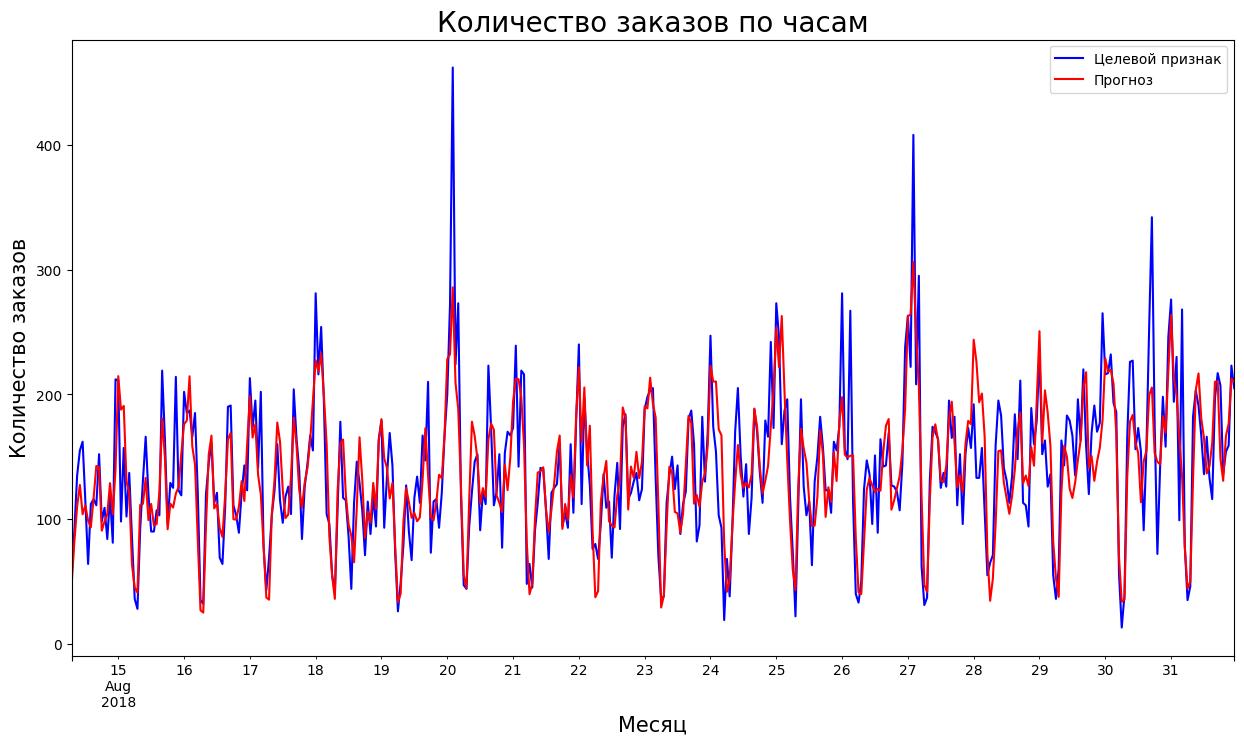

In [48]:
y_predict = pd.Series(y_predict_neural, index=y_test.index)
# Построение графика
plt.figure(figsize=(15, 8))

# Построение линии для y_test (Целевой признак)
y_test.plot(label='Целевой признак', color='blue')
# Построение линии для y_predict (Прогноз)
y_predict.plot(label='Прогноз', color='red')

# Добавление подписей осей и заголовка
plt.title('Количество заказов по часам', fontsize=20)
plt.xlabel('Месяц', fontsize=15)
plt.ylabel('Количество заказов', fontsize=15)

# Добавление легенды
plt.legend()

# Показ графика
plt.show()

По графику видно, что модель плохо предсказывает большие количества, то есть она занижает свои прогнозы, что может привести к нехватке такси и недополучению прибыли.

Посмотрим на остатки модели

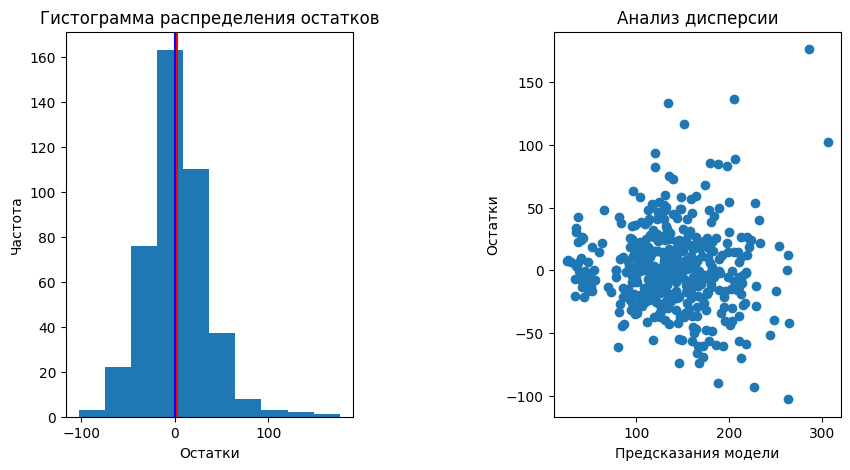

In [49]:
residuals = y_test - y_predict_neural

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
plt.subplots_adjust(wspace=0.7, hspace=0.5)
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[0].set_ylabel('Частота')
axes[0].axvline(x=0, color='Blue')
axes[0].axvline(x=residuals.mean(), color='Red')
axes[1].scatter(x=y_predict_neural, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

По анализу остатков модели видно, что модель занижает прогноз, это можно объяснить тем, что в августе было повышение количества заказов.

## Вывод

Целью проекта было построение модели для предсказания количества такси на следующий час.

Файл с исходными данными был ресемплирован по 1 часу, так как прогноз необходимо было предоставить именно за час.

Анализ показал, что наблюдается зависимость количества заказов от месяца и времени суток.

- Количество заказов возрастает с марта по август, достигая пика в августе. 
- Максимальное количество заказов приходится на 00:00, с последующим спадом к 6:00 утра и двумя пиками в 11:30 и 17:30, которые могут быть связаны с расписанием авиарейсов. 
- Закономерности в заказах чётко прослеживаются в течение суток. 
- Для дальнейшего анализа и прогнозирования добавлены новые столбцы, включающие данные по дням, дням недели и часам.


В ходе работы были обучены 6 моделей и построена нейронная сеть для предсказания количества заказов такси на следующий час (см. сравнительную таблицу ниже).

Ключевые параметры для создания признаков:
- lag: 168
- rolling_mean: 100

Для всех моделей, кроме линейной регрессии, был произведён перебор гиперпараметров. Для проверки адекватности моделей были построены два базовых прогноза:
- С использованием среднего значения.
- С использованием предыдущего значения ряда.

По результатам проведенной работы о построения моделей с перебором гиперпараметров лучшими показателями обладет модель **Нейросеть**:

- Ее характеристики: Best Params: {'hidden_layers': [20, 40], 'learning_rate': 0.01, 'activation_func': 'ReLU'}
- RMSE на тренировочной выборке: 22.42
- RMSE на тестовой выборке: 33.48

In [50]:
table

,Модель,Время обучения,Параметры,Значение RMSE
0,Сonstant,-,mean,84.744100
1,Prev_amount,-,prev_amount,59.054504
2,LinearRegression,0.078104,{'scaler': StandardScaler()},24.250628
3,DecisionTreeRegressor,0.228341,"{'regressor__max_depth': 5, 'regressor__max_fe...",26.900000
4,LGBMRegressor,0.673028,"{'learning_rate': 0.1, 'n_estimators': 50}",23.050000
5,KNeighborsRegressor,0.01559,"{'n_neighbors': 5, 'weights': 'distance'}",25.320000
6,XGBRegressor,0.703722,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",22.501600
7,CatBoostRegressor,3.348722,"{'iterations': 100, 'learning_rate': 0.1}",22.763300
8,Neural network,2.02068,"{'hidden_layers': [20, 40], 'learning_rate': 0...",22.422835


In [52]:
print(f"RMSE on test set neural: {rmse_test_neural:.4f}")

RMSE on test set neural: 33.4804


### Рекомендации

Для  более точного предсказания количества заказов на следующий час необходимо собрать базу данных за год, а не только за несколько месяцев, так как наблюдается повышение количества заказов в августе, что снижает качество предсказания.